In [1]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics

!pip install scikit-plot
import scikitplot as skplt
import xgboost 

In [3]:
os.chdir("C:\\Users\\Jack\\Documents_\\Thesis_2\\Datasets")

In [4]:
df = pd.read_excel("df_final.xlsx")

In [5]:
len(df)

123637

In [6]:
df = df[['Headline', # not a feature for training
    'Bias',
 'glove_vec300_norm',
 'tf_idf',
 'negative',
 'positive',
 'bias_lex_h',
'bias_lex_r',
 'assertives',
 'factives',
 'report_verbs',
 'implicatives',
 'hedges',
 'affect (Affect)',
 'posemo (Positive Emotions)',
 'negemo (Negative Emotions)',
 'anx (Anx)',
 'anger (Anger)',
 'sad (Sad)',
 'social (Social)',
 'family (Family)',
 'friend (Friends)',
 'female (Female)',
 'male (Male)',
 'cogproc (Cognitive Processes)',
 'insight (Insight)',
 'cause (Causal)',
 'discrep (Discrepancies)',
 'tentat (Tentative)',
 'certain (Certainty)',
 'differ (Differentiation)',
 'percept (Perceptual Processes)',
 'see (See)',
 'hear (Hear)',
 'feel (Feel)',
 'bio (Biological Processes)',
 'body (Body)',
 'health (Health)',
 'sexual (Sexual)',
 'ingest (Ingest)',
 'drives (Drives)',
 'affiliation (Affiliation)',
 'achieve (Achievement)',
 'power (Power)',
 'reward (Reward)',
 'risk (Risk)',
 'focuspast (Past Focus)',
 'focuspresent (Present Focus)',
 'focusfuture (Future Focus)',
 'relativ (Relativity)',
 'motion (Motion)',
 'space (Space)',
 'time (Time)',
 'work (Work)',
 'leisure (Leisure)',
 'home (Home)',
 'money (Money)',
 'relig (Religion)',
 'death (Death)',
 'informal (Informal Language)',
 'swear (Swear)',
 'netspeak (Netspeak)',
 'assent (Assent)',
 'nonflu (Nonfluencies)',
 'filler (Filler Words)',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_context',
 'positive_context',
 'bias_lex_h_context',
'bias_lex_r_context',
 'assertives_context',
 'factives_context',
 'report_verbs_context',
 'implicatives_context',
 'hedges_context',
'affect (Affect)_context',
 'posemo (Positive Emotions)_context',
 'negemo (Negative Emotions)_context',
 'anx (Anx)_context',
 'anger (Anger)_context',
 'sad (Sad)_context',
 'social (Social)_context',
 'family (Family)_context',
 'friend (Friends)_context',
 'female (Female)_context',
 'male (Male)_context',
 'cogproc (Cognitive Processes)_context',
 'insight (Insight)_context',
 'cause (Causal)_context',
 'discrep (Discrepancies)_context',
 'tentat (Tentative)_context',
 'certain (Certainty)_context',
 'differ (Differentiation)_context',
 'percept (Perceptual Processes)_context',
 'see (See)_context',
 'hear (Hear)_context',
 'feel (Feel)_context',
 'bio (Biological Processes)_context',
 'body (Body)_context',
 'health (Health)_context',
 'sexual (Sexual)_context',
 'ingest (Ingest)_context',
 'drives (Drives)_context',
 'affiliation (Affiliation)_context',
 'achieve (Achievement)_context',
 'power (Power)_context',
 'reward (Reward)_context',
 'risk (Risk)_context',
 'focuspast (Past Focus)_context',
 'focuspresent (Present Focus)_context',
 'focusfuture (Future Focus)_context',
 'relativ (Relativity)_context',
 'motion (Motion)_context',
 'space (Space)_context',
 'time (Time)_context',
 'work (Work)_context',
 'leisure (Leisure)_context',
 'home (Home)_context',
 'money (Money)_context',
 'relig (Religion)_context',
 'death (Death)_context',
 'informal (Informal Language)_context',
 'swear (Swear)_context',
 'netspeak (Netspeak)_context',
 'assent (Assent)_context',
 'nonflu (Nonfluencies)_context',
 'filler (Filler Words)_context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [7]:
print('Number of missing values:')
mis = (df.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
df = df.dropna(subset=['tf_idf'])

Number of missing values:
tf_idf 5662


In [8]:
len(df['Headline'].unique())

16294

In [9]:
df["Label"] = df.Bias.apply(lambda x: 1 if x == "AllSides Media Bias Rating: Left" or x == "AllSides Media Bias Rating: Right" else 0)

In [10]:
x = df.drop(['Label', 'Bias', 'Headline'], 1)
y = df[['Label']]
headline = df[['Headline']]

In [11]:
headlines = pd.read_excel("Headlines_Tokenized.xlsx")
headlines.head()

,Unnamed: 0,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,Label
0,0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021",COVID Deaths Continue to Decline in U.S.,"[{'text': 'COVID', 'text_low': 'covid', 'pos':...",0
1,1,Wall Street Journal (News),Vaccines Appear to Be Slowing Spread of Covid-...,Vaccines appear to be starting to curb new Cov...,AllSides Media Bias Rating: Center,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021",Vaccines Appear to Be Slowing Spread of Covid-...,"[{'text': 'Vaccines', 'text_low': 'vaccines', ...",0
2,2,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021",Pandemic retreat signals vaccines are working,"[{'text': 'Pandemic', 'text_low': 'pandemic', ...",0
3,3,The Epoch Times,"NYT, Washington Post, NBC Retract Incorrect Re...","The New York Times, The Washington Post, and N...",AllSides Media Bias Rating: Lean Right,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","NYT, Washington Post, NBC Retract Incorrect Re...","[{'text': 'NYT', 'text_low': 'nyt', 'pos': 'PR...",0
4,4,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","New York Times, WaPo, NBC retract reports abou...","[{'text': 'New', 'text_low': 'new', 'pos': 'PR...",0


In [14]:
print('Number of missing values:')
mis = (headlines.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])



Number of missing values:
Source 6
Text 5
Subject_Tag 285


In [15]:
len(df)

117975

In [16]:
len(df['Headline'].unique())

16294

In [17]:
x_h = headlines["spacy_lg_dict"]
y_h = headlines[['Label']]
headline_h = headlines[['Headline']]

In [18]:
# train-test split
train_features, test_features, train_labels, test_labels, train_headlines, test_headlines = train_test_split(x, y, headline,
                                                                                                             test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels, train_headlines1, val_headlines = train_test_split(train_features, train_labels, train_headlines,
                                                                                                             test_size = 0.10, random_state = 42)

In [19]:
# train-test split
train_features_h, test_features_h, train_labels_h, test_labels_h, train_headlines_h, test_headlines_h = train_test_split(x_h, y_h, headline_h,
                                                                                                             test_size = 0.10, random_state = 42)
train_features1_h, val_features_h, train_labels1_h, val_labels_h, train_headlines1_h, val_headlines_h = train_test_split(train_features_h, train_labels_h, train_headlines_h,
                                                                                                             test_size = 0.10, random_state = 42)

In [20]:
feature_names = list(x.columns)

In [21]:
# matrix for XGBoost
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [22]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (106177, 268)
Training Labels Shape: (106177, 1)
Testing Features Shape: (11798, 268)
Testing Labels Shape: (11798, 1)
Training Features for final model Shape: (95559, 268)
Training Labels for final model Shape: (95559, 1)
Validation Features Shape: (10618, 268)
Validation Labels Shape: (10618, 1)


In [23]:
b1_pred = pd.Series(np.random.randint(2, size=len(test_features)))

In [24]:
print('Performance of b1, test:')
print('F1:', round(metrics.f1_score(test_labels,b1_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b1_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b1_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b1_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b1_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b1_pred).transpose())

Performance of b1, test:
F1: 0.35
Precision: 0.27
Recall: 0.51
AUC: 0.51
Accuracy: 0.5
Confusion matrix:
 [[4347 1511]
 [4346 1594]]


In [25]:
b2_pred = test_features.negative

In [26]:
type(b2_pred)

pandas.core.series.Series

In [27]:
type(test_labels)

pandas.core.frame.DataFrame

In [28]:
print('Performance of b2, test:')
print('F1:', round(metrics.f1_score(test_labels,b2_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b2_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b2_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b2_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b2_pred),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b2_pred).transpose())

Performance of b2, test:
F1: 0.13
Precision: 0.26
Recall: 0.08
AUC: 0.5
Accuracy: 0.7
Confusion matrix:
 [[7942 2847]
 [ 751  258]]


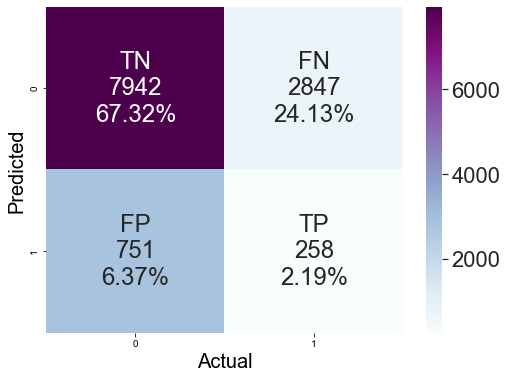

In [29]:
cf_matrix = metrics.confusion_matrix(test_labels,b2_pred)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

In [31]:
b3_pred = test_features.apply(lambda row: 1 if row.negative==1 or row.positive==1 else 0, axis=1)

In [32]:
print('Performance of b3, test:')
print('F1:', round(metrics.f1_score(test_labels,b3_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b3_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b3_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b3_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b3_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b3_pred).transpose())

Performance of b3, test:
F1: 0.19
Precision: 0.25
Recall: 0.15
AUC: 0.49
Accuracy: 0.66
Confusion matrix:
 [[7283 2644]
 [1410  461]]


In [33]:
b4_pred = test_features.bias_lex_h

In [34]:
print('Performance of b4, test:')
print('F1:', round(metrics.f1_score(test_labels,b4_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b4_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b4_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b4_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b4_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b4_pred).transpose())

Performance of b4, test:
F1: 0.08
Precision: 0.27
Recall: 0.05
AUC: 0.5
Accuracy: 0.71
Confusion matrix:
 [[8277 2953]
 [ 416  152]]


In [35]:
b5_pred = test_features.bias_lex_r

In [36]:
print('Performance of b5, test:')
print('F1:', round(metrics.f1_score(test_labels,b5_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b5_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b5_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b5_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b5_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b5_pred).transpose())

Performance of b5, test:
F1: 0.24
Precision: 0.24
Recall: 0.23
AUC: 0.49
Accuracy: 0.61
Confusion matrix:
 [[6466 2384]
 [2227  721]]


In [37]:
print('Biased words:',round(len(y[y['Label']==1])/len(y)*100,0),'%')
print('Neutral words:',round(len(y[y['Label']==0])/len(y)*100,0),'%')

Biased words: 26.0 %
Neutral words: 74.0 %


In [38]:
!pip install transformers
!pip install sentencepiece

In [2]:
import sys
import os
import time
import re
import random
from typing import Dict, List, Optional, Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from transformers import BertTokenizer, BertConfig, TFBertForSequenceClassification
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from transformers import ElectraTokenizer, TFElectraForSequenceClassification
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from transformers import LongformerTokenizer, TFLongformerForSequenceClassification

In [3]:
# set seed, TF uses python ramdom and numpy library, so these must also be fixed
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
os.environ['PYTHONHASHSEED']=str(0)
os.environ['TF_DETERMINISTIC_OPS'] = '0'

In [4]:
# see if hardware accelerator available
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [5]:
tf.test.gpu_device_name()

''

In [7]:
os.chdir("C:\\Users\\Jack\\Documents_\\Thesis_2\\Datasets")
df_final = pd.read_csv("DatasetFull.csv", encoding = 'latin-1')

In [8]:
df_final["Label"] = df_final.Bias.apply(lambda x: 1 if x == "AllSides Media Bias Rating: Left" or x == "AllSides Media Bias Rating: Right" else 0)

In [9]:
# Stratified k-Fold instance
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
# helper functions called in skfold loop

def pd_to_tf(df):
    """convert a pandas dataframe into a tensorflow dataset"""
    target = df.pop('Label')
    headline = df.pop('Headline')
    return tf.data.Dataset.from_tensor_slices((headline.values, target.values))

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

def tokenize(df):
    """convert a pandas dataframe into a tensorflow dataset and run hugging face's tokenizer on data"""
    target = df.pop('Label')
    headline = df.pop('Headline')

    train_encodings = tokenizer(
                        headline.tolist(),                      
                        add_special_tokens = True, # add [CLS], [SEP]
                        truncation = True, # cut off at max length of the text that can go to BERT
                        padding = True, # add [PAD] tokens
                        return_attention_mask = True, # add attention mask to not focus on pad tokens
              )
    
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(train_encodings), 
         target.tolist()))
    return dataset

In [11]:
def run_model_5fold(df_train, model_name, freeze_encoder=True, pretrained=False, plot=False):
    """"freeze flags whether encoder layer should be frozen to not destroy transfer learning. Only set to false when enough data is provided"""

    # these variables will be needed for skfold to select indices
    Y = df_train['Label']
    X = df_train['Headline']

    # hyperparams
    BUFFER_SIZE = 10000
    BATCH_SIZE = 32
    k = 1

    val_loss = []
    val_acc = []
    val_prec = []
    val_rec = []
    val_f1 = []
    val_f1_micro = []
    val_f1_wmacro = []

    for train_index, val_index in skfold.split(X,Y):
        print('### Start fold {}'.format(k))

        # split into train and validation set
        train_dataset = df_train.iloc[train_index]
        val_dataset = df_train.iloc[val_index]

        # prepare data for transformer
        train_dataset = tokenize(train_dataset)
        val_dataset = tokenize(val_dataset)

        # mini-batch it
        train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
        val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

        # create new model
        if model_name == 'bert':
            model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
        if model_name == 'distilbert':
            model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
        elif model_name == 'roberta':
            model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')
        elif model_name == 'electra':
            model = TFElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator')
        elif model_name == 'xlnet':
            model = TFXLNetForSequenceClassification.from_pretrained('xlnet-base-cased')


        if freeze_encoder == True:
            for w in model.get_layer(index=0).weights:
                w._trainable = False

        # compile it
        optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5) 
        model.compile(optimizer=optimizer, loss=model.compute_loss) 

        # transfer learning
        if pretrained == True:
            model.get_layer(index=0).set_weights(trained_model_layer) # load bias-specific weights
            #model.load_weights('./checkpoints/')

        # after 2 epochs without improvement, stop training
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

        # fit it
        history = model.fit(train_dataset, epochs=10, validation_data = val_dataset, callbacks=[callback])

        # plot history
        if plot:
            plot_graphs(history,'loss')

        # evaluate
        loss = model.evaluate(val_dataset)

        if model_name == 'xlnet':
            yhats = []
            for row in df_train.iloc[val_index]['sentence']:
                input = tokenizer(row, return_tensors="tf")
                output = model(input)
                logits = output.logits.numpy()[0]
                candidates = logits.tolist()
                decision = candidates.index(max(candidates))
                yhats.append(decision)
        else:
            logits = model.predict(val_dataset)  
            yhats = []
            for i in logits[0]:
                # assign class label according to highest logit
                candidates = i.tolist()
                decision = candidates.index(max(candidates))
                yhats.append(decision)

        y = []
        for text, label in val_dataset.unbatch():   
              y.append(label.numpy())

        val_loss.append(loss)
        val_acc.append(accuracy_score(y, yhats))
        val_prec.append(precision_score(y, yhats))
        val_rec.append(recall_score(y, yhats))
        val_f1.append(f1_score(y, yhats))
        val_f1_micro.append(f1_score(y, yhats, average='micro'))
        val_f1_wmacro.append(f1_score(y, yhats, average='weighted'))

        tf.keras.backend.clear_session()

        k += 1

    return val_loss, val_acc, val_prec, val_rec, val_f1, val_f1_micro, val_f1_wmacro

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# without distant signal pretraining
val_loss, val_acc, val_prec, val_rec, val_f1, val_f1_micro, val_f1_wmacro = run_model_5fold(df_final, model_name='bert', 
                                                                                            freeze_encoder=False, pretrained=False)

# inspect metrics
loss_cv = np.mean(val_loss)
acc_cv = np.mean(val_acc)
prec_cv = np.mean(val_prec)
rec_cv = np.mean(val_rec)
f1_cv = np.mean(val_f1)
f1_micro_cv = np.mean(val_f1_micro)
f1_wmacro_cv = np.mean(val_f1_wmacro)

print('5-Fold CV Loss: {}'.format(loss_cv))
print('5-Fold CV Accuracy: {}'.format(acc_cv))
print('5-Fold CV Precision: {}'.format(prec_cv))
print('5-Fold CV Recall: {}'.format(rec_cv))
print('5-Fold CV F1 Score: {}'.format(f1_cv))
print('5-Fold CV Micro F1 Score: {}'.format(f1_micro_cv))
print('5-Fold CV Weighted Macro F1 Score: {}'.format(f1_wmacro_cv))

### Start fold 1


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
415/415 [==============================] - 10958s 26s/step - loss: 0.5738 - val_loss: 0.5636
Epoch 2/10
104/104 [==============================] - 683s 7s/step - loss: 0.5636
### Start fold 2


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
415/415 [==============================] - 11098s 27s/step - loss: 0.5756 - val_loss: 0.5687
Epoch 2/10
104/104 [==============================] - 800s 8s/step - loss: 0.5687
### Start fold 3


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
112/415 [=======>......................] - ETA: 1:30:23 - loss: 0.5829

KeyboardInterrupt: 